In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv(r'C:\Users\harsh\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\harsh\Downloads\test.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.shape

(418, 12)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


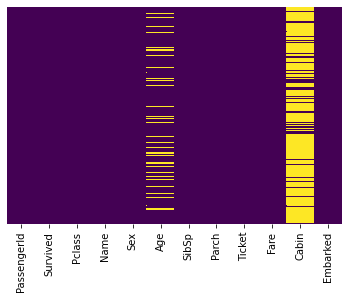

In [7]:
import seaborn as sns
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, there are 891 rows in train set and 418 rows in test set. Also as we can see, most of the columns are not null. There are few columns which have null values as well. They are:

Age
Cabin
Embarked
Out of this, 'Cabin' variable is Null for most part of the rows. So it is better to remove the 'Cabin' variable for model building.

In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

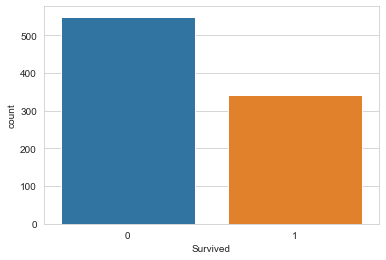

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df)

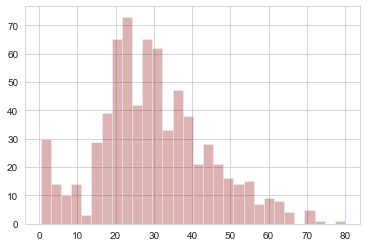

In [12]:
train_df['Age'].hist(bins=30,color='darkred',alpha=0.3)

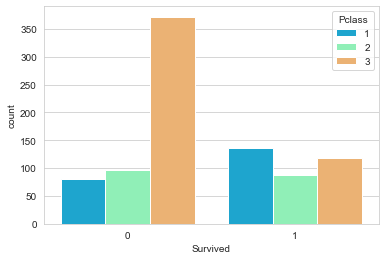

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='rainbow')

Text(0.5, 1.0, 'Fare Distribution')

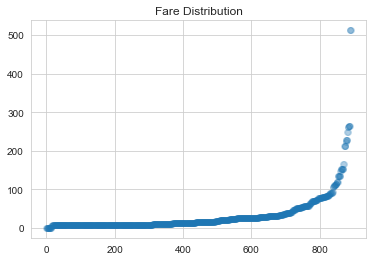

In [14]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Fare), alpha=0.2)
plt.title("Fare Distribution")

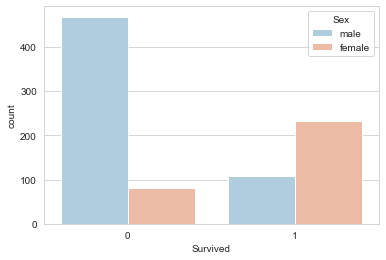

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='RdBu_r')

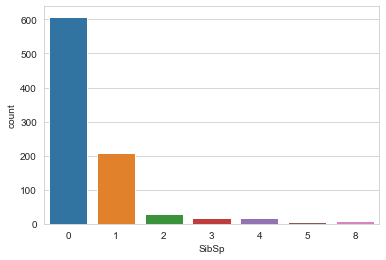

In [16]:
sns.countplot(x='SibSp',data=train_df)

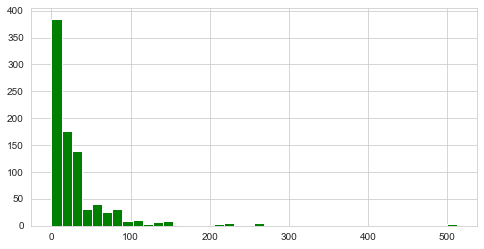

In [17]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [18]:
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Embarked']]

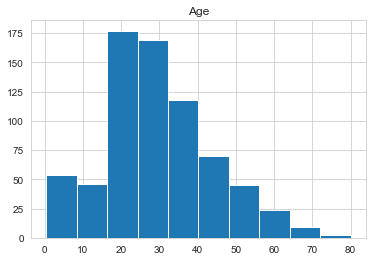

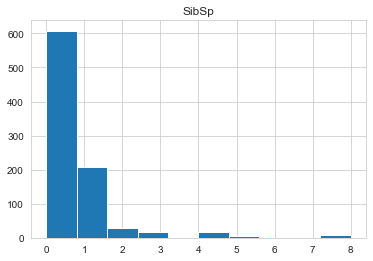

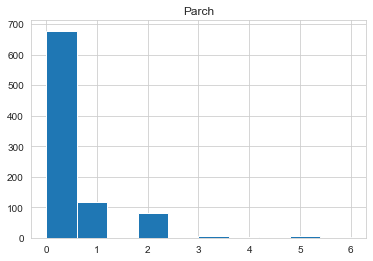

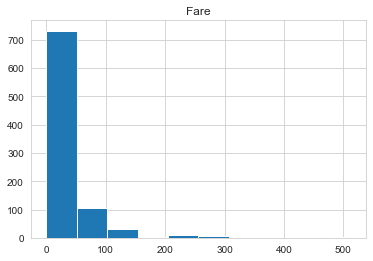

In [19]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


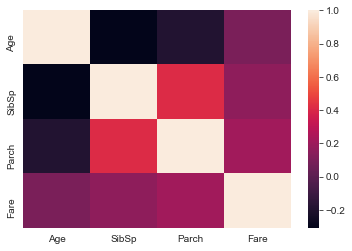

In [20]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [21]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [22]:
#numeric vs non numeric 
train_df['numeric_ticket'] = train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_letters'] = train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train_df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train_df['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
wep            3
sopp           3
sotono2        2
scah           2
ppp            2
swpp           2
scow           1
as             1
sp             1
fa             1
sca4           1
casoton        1
sop            1
sc             1
scahbasle      1
fc             1
Name: ticket_letters, dtype: int64

In [24]:
pd.pivot_table(train_df,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


The pivot table above doesn't provides any insights as such because ticket being numeric or not, doesn't affects the survival rate

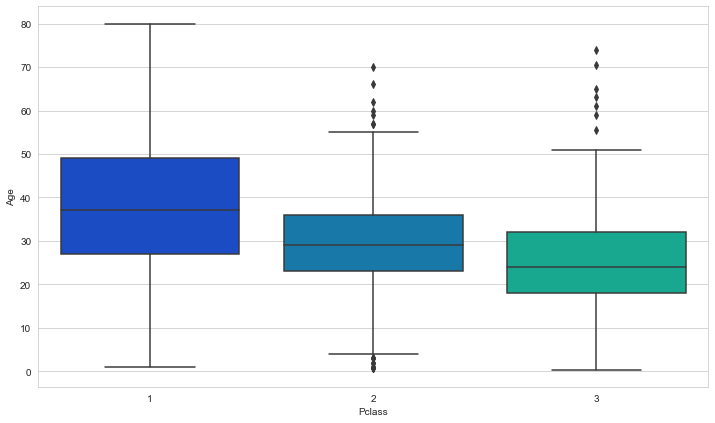

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

Here we see a clear relation between Pclass and Age in the data, i.e, People travelling in Class 1 had average age higher than others

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [27]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

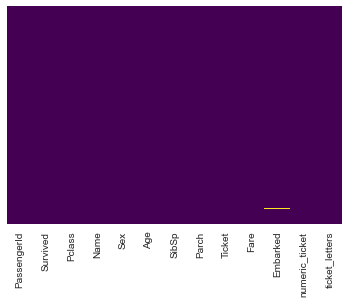

In [28]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [30]:
train_df.dropna(inplace=True)

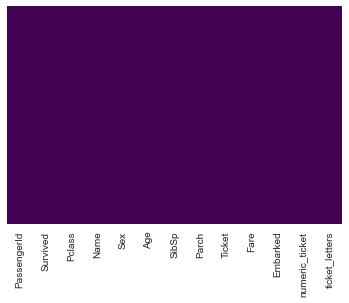

In [31]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
pd.get_dummies(train_df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [34]:
train_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,numeric_ticket,ticket_letters
0,1,0,3,male,22.0,1,0,7.2500,S,0,a5
1,2,1,1,female,38.0,1,0,71.2833,C,0,pc
2,3,1,3,female,26.0,0,0,7.9250,S,0,stono2
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0


In [36]:
train_df.drop(['numeric_ticket','ticket_letters'],axis=1,inplace=True)

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [38]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [40]:
train_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
train_df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [43]:
train_df['Survived'].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Cross Validation

If we build models on the whole train dataset, how do we know the performance on the model on a new dataset??

So what we can instead do is to build the model on a part of the dataset and then test it on the other part so that we get an idea of how our model performs on a new data. This process is known as Model Validation in Machine Learning field.

So now let us split the train data into two parts

1. Developement sample
2. Validation Sample

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_X = train_df[["Pclass","Age", "SibSp", "Parch", "Fare","male","Q","S"]]
train_y = train_df["Survived"]

In [46]:
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()
logmodel.fit(dev_X,dev_y)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:

predictions = logmodel.predict(val_X)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
accuracy=confusion_matrix(val_y,predictions)
accuracy

array([[156,  28],
       [ 26,  84]], dtype=int64)

In [52]:

accuracy=accuracy_score(val_y,predictions)
accuracy

0.8163265306122449

In [53]:
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


Now we work on test data

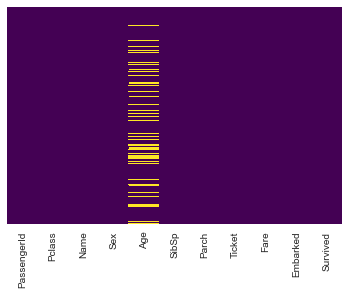

In [55]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have already dropped "Cabin" above

Also we can drop Ticket and Name column here

In [56]:
test_df.drop(['Ticket','Name'], axis=1, inplace=True)

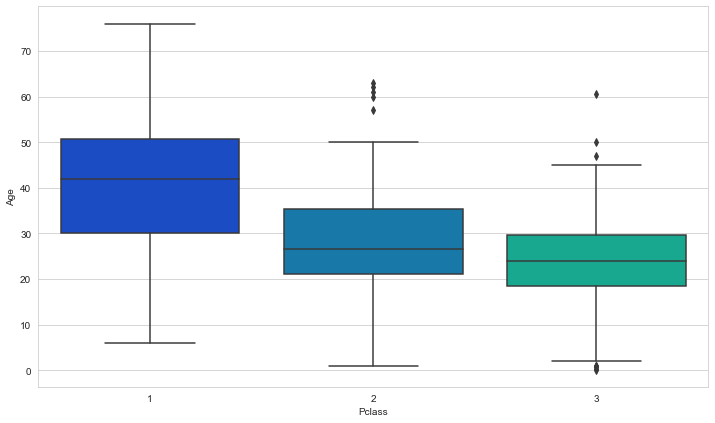

In [57]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test_df,palette='winter')

In [58]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [59]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age,axis=1)

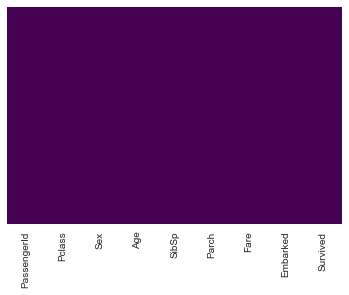

In [60]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
pd.get_dummies(test_df['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [62]:
sex = pd.get_dummies(test_df['Sex'],drop_first=True)
embark = pd.get_dummies(test_df['Embarked'],drop_first=True)

In [63]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,0


In [64]:
test_df = pd.concat([test_df,sex,embark],axis=1)

In [65]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,1


In [66]:
test_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [67]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


In [68]:
test_x = test_df[["Pclass","Age", "SibSp", "Parch", "Fare","male","Q","S"]]
test_y = test_df[["Survived"]]

In [69]:
np.any(np.isnan(test_df))

True

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Survived     418 non-null    int64  
 7   male         418 non-null    uint8  
 8   Q            418 non-null    uint8  
 9   S            418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [71]:
test_df.nsmallest(10, 'Fare')

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
266,1158,1,42.0,0,0,0.0000,0,1,0,1
372,1264,1,49.0,0,0,0.0000,0,1,0,1
21,913,3,9.0,0,1,3.1708,0,1,0,1
116,1008,3,25.0,0,0,6.4375,0,1,0,0
133,1025,3,25.0,1,0,6.4375,0,1,0,0
232,1124,3,21.0,1,0,6.4958,0,1,0,1
291,1183,3,30.0,0,0,6.9500,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
163,1055,3,25.0,0,0,7.0000,0,1,0,1
211,1103,3,25.0,0,0,7.0500,0,1,0,1


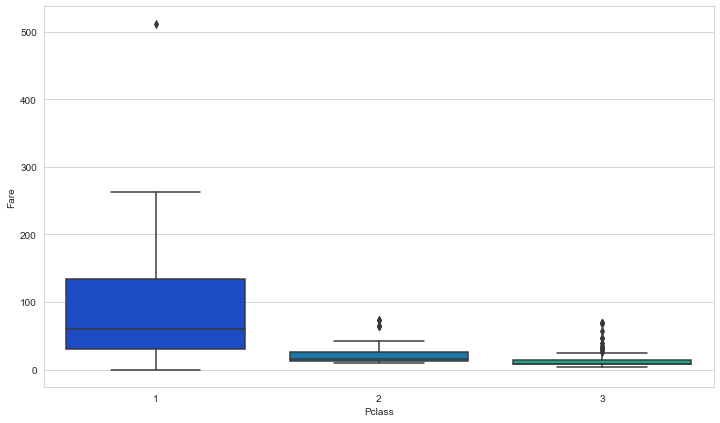

In [72]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=test_df,palette='winter')

In [73]:
test_df[test_df['Fare'].isnull()]
#df[df['column name'].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
152,1044,3,60.5,0,0,NaN,0,1,0,1


In [74]:
#here we can see Fare for Pclass=3 has many outliers so we will choose median to fill null value
test_df['Fare'].fillna((test_df['Fare'].median()),inplace=True)

In [75]:
np.all(np.isfinite(test_df))

True

In [76]:
np.any(np.isnan(test_df))

False

In [79]:
des_fac=['Pclass','Age','SibSp','Parch','Fare','male','Q','S']

In [80]:
test_data = test_df[des_fac]

In [81]:
predictiontest = logmodel.predict(test_data)

In [82]:
predictiontest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [85]:
outcome = pd.DataFrame(predictiontest)
pass_id = pd.read_csv(r'C:\Users\harsh\Downloads\test.csv')[['PassengerId']]
result = pd.concat([pass_id,outcome], axis=1)
result.columns = ['PassengerId','Survived']
result.to_csv(r'C:\Users\harsh\Desktop\result.csv',encoding='utf-8', columns=['PassengerId','Survived'], index=False)